In [33]:
import pandas as pd
df=pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


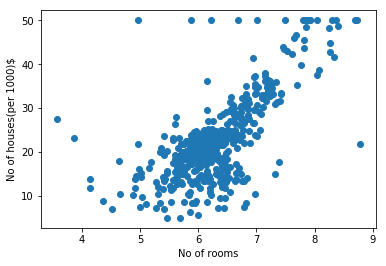

In [34]:
import matplotlib.pyplot as plt
X=df.drop('MEDV',axis=1).values
y=df['MEDV'].values
X_rooms=X[:,5]
y=y.reshape(-1,1)
X_rooms=X_rooms.reshape(-1,1)
plt.scatter(X_rooms,y)
plt.xlabel('No of rooms')
plt.ylabel('No of houses(per 1000)$')
plt.show()

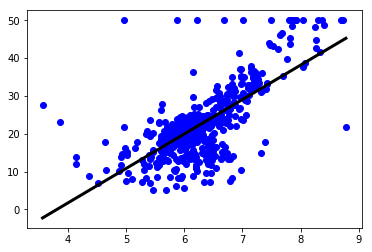

In [35]:
#Fitting a regression model

import numpy as np
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(X_rooms,y)
prediction_space=np.linspace(min(X_rooms),max(X_rooms)).reshape(-1,1)
plt.scatter(X_rooms,y,color='blue')
plt.plot(prediction_space,reg.predict(prediction_space),color='black',linewidth=3)
plt.show()

In [36]:
#Linear Regression in Scikit learn

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
reg.score(X_test,y_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE :{}".format(rmse))


RMSE :4.6386899261728045


In [37]:
#5 Folds Cross Validation

from sklearn.model_selection import cross_val_score
reg=linear_model.LinearRegression()
ans=cross_val_score(reg,X_rooms,y,cv=5)
ans

array([ 0.70708692,  0.63476138,  0.50385441, -0.21594318, -1.77736913])

In [38]:
#Ridge regression in scikit learn

from sklearn.linear_model import Ridge
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
ridge.score(X_test,y_test)

0.69969382751273135

In [39]:
#Lasso Regression in scilkit learn

from sklearn.linear_model import Lasso
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
lasso=Lasso(alpha=0.1,normalize=True)
lasso.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)
lasso.score(X_test,y_test)

0.59502295353285506

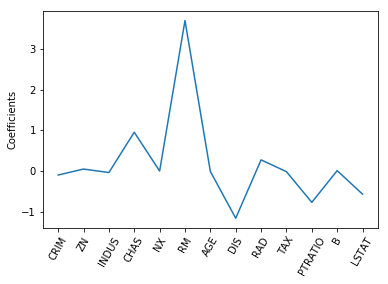

In [40]:
#Lasso for feature selection in scikit learning

from sklearn.linear_model import Lasso
names=df.drop('MEDV',axis=1).columns
lasso=Lasso(alpha=0.1)
lasso_coef=lasso.fit(X,y).coef_
_=plt.plot(range(len(names)),lasso_coef)
_=plt.xticks(range(len(names)),names,rotation=60)
_=plt.ylabel('Coefficients')
plt.show()